In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Diploma Postítulo de Data Science
## Aplicaciones de Data Science
### Actividad 1 - Procesamiento de Lenguaje Natural
En esta actividad exploraremos con [TextBlob](http://textblob.readthedocs.org/), una librería en Python para NLP, que facilita tareas de análisis morfológico, extracción de entidades, análisis de sentimientos, análisis de opiniones, traducción automática, entre otras. Está implementada sobre otras dos librerías de Python: [NLTK](http://www.nltk.org/) y [Pattern](https://pypi.org/project/Pattern/). Su propósito es proveer de una interfaz más simple de análisis.

Primero importamos el objeto `TextBlob` que nos permite acceder a todas sus herramentas.

In [2]:
#!pip install textblob
from textblob import TextBlob

Inicialmente puede que requiramos instalar algunas herramientas de `NLTK`.

In [3]:
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Ahora creemos una instancia del objeto `TextBlob`, que podemos entender como una cadena de texto enriquecida para su análisis.

In [4]:
texto = """Yes, my children. The first one is a building with a ramp for access to minors. A truck with materials. This is the Congress. 
These are the values for the boats. The sea is in the O'Higgins square. The church, and this is a traffic light. 
Since we want a clean city, these are the dumps. This one is the British Arch. It's a Red Cross. Like the song Noelia. 
The same thing ask that the other group is there. Who are the 3 things that you would highlight? They decided my ideal city, 
obviously Valparaíso is represented with the characteristic symbols of the Congress, is this true? My ideal city is clean,
with boats that sail through the sea."""
t = TextBlob(texto)
print(t)

Yes, my children. The first one is a building with a ramp for access to minors. A truck with materials. This is the Congress. 
These are the values for the boats. The sea is in the O'Higgins square. The church, and this is a traffic light. 
Since we want a clean city, these are the dumps. This one is the British Arch. It's a Red Cross. Like the song Noelia. 
The same thing ask that the other group is there. Who are the 3 things that you would highlight? They decided my ideal city, 
obviously Valparaíso is represented with the characteristic symbols of the Congress, is this true? My ideal city is clean,
with boats that sail through the sea.


###Procesamiento de oraciones, palabras y entidades
Podemos segmentar las oraciones de nuestro texto usando la propiedad `.sentences`:

In [5]:
print(t.sentences)

[Sentence("Yes, my children."), Sentence("The first one is a building with a ramp for access to minors."), Sentence("A truck with materials."), Sentence("This is the Congress."), Sentence("These are the values for the boats."), Sentence("The sea is in the O'Higgins square."), Sentence("The church, and this is a traffic light."), Sentence("Since we want a clean city, these are the dumps."), Sentence("This one is the British Arch."), Sentence("It's a Red Cross."), Sentence("Like the song Noelia."), Sentence("The same thing ask that the other group is there."), Sentence("Who are the 3 things that you would highlight?"), Sentence("They decided my ideal city, 
obviously Valparaíso is represented with the characteristic symbols of the Congress, is this true?"), Sentence("My ideal city is clean,
with boats that sail through the sea.")]


In [6]:
print("Tenemos", len(t.sentences), "oraciones.\n")

for sentence in t.sentences:
    print(sentence)
    print("-" * 75)

Tenemos 15 oraciones.

Yes, my children.
---------------------------------------------------------------------------
The first one is a building with a ramp for access to minors.
---------------------------------------------------------------------------
A truck with materials.
---------------------------------------------------------------------------
This is the Congress.
---------------------------------------------------------------------------
These are the values for the boats.
---------------------------------------------------------------------------
The sea is in the O'Higgins square.
---------------------------------------------------------------------------
The church, and this is a traffic light.
---------------------------------------------------------------------------
Since we want a clean city, these are the dumps.
---------------------------------------------------------------------------
This one is the British Arch.
---------------------------------------------------

También podemos segmentar las palabras con la propiedad `.words`:

In [7]:
print(t.words)
print(texto.split())

['Yes', 'my', 'children', 'The', 'first', 'one', 'is', 'a', 'building', 'with', 'a', 'ramp', 'for', 'access', 'to', 'minors', 'A', 'truck', 'with', 'materials', 'This', 'is', 'the', 'Congress', 'These', 'are', 'the', 'values', 'for', 'the', 'boats', 'The', 'sea', 'is', 'in', 'the', "O'Higgins", 'square', 'The', 'church', 'and', 'this', 'is', 'a', 'traffic', 'light', 'Since', 'we', 'want', 'a', 'clean', 'city', 'these', 'are', 'the', 'dumps', 'This', 'one', 'is', 'the', 'British', 'Arch', 'It', "'s", 'a', 'Red', 'Cross', 'Like', 'the', 'song', 'Noelia', 'The', 'same', 'thing', 'ask', 'that', 'the', 'other', 'group', 'is', 'there', 'Who', 'are', 'the', '3', 'things', 'that', 'you', 'would', 'highlight', 'They', 'decided', 'my', 'ideal', 'city', 'obviously', 'Valparaíso', 'is', 'represented', 'with', 'the', 'characteristic', 'symbols', 'of', 'the', 'Congress', 'is', 'this', 'true', 'My', 'ideal', 'city', 'is', 'clean', 'with', 'boats', 'that', 'sail', 'through', 'the', 'sea']
['Yes,', 'my

Para acceder a las entidades (sintagmas nominales) del texto, usamos la propiedad `.noun_phrases`:

In [8]:
print("El texto contiene las siguientes", len(t.noun_phrases), "entidades:")
for element in t.noun_phrases:
    print("-", element)

El texto contiene las siguientes 12 entidades:
- congress
- o'higgins
- clean city
- arch
- red cross
- noelia
- who
- ideal city
- valparaíso
- characteristic symbols
- congress
- ideal city


Podemos jugar con lemas, singulares y plurales, con mayor o menor precisión:

In [9]:
for word in t.words:
    if word.endswith("s"):
        print(word.lemmatize(), word, word.singularize())
    else:
        print(word.lemmatize(), word, word.pluralize())

Yes Yes Ye
my my our
child children childrens
The The Thes
first first firsts
one one ones
is is is
a a some
building building buildings
with with withs
a a some
ramp ramp ramps
for for fors
access access acces
to to toes
minor minors minor
A A As
truck truck trucks
with with withs
material materials material
This This Thi
is is is
the the thes
Congress Congress Congres
These These These
are are ares
the the thes
value values value
for for fors
the the thes
boat boats boat
The The Thes
sea sea seas
is is is
in in ins
the the thes
O'Higgins O'Higgins O'Higgin
square square squares
The The Thes
church church churches
and and ands
this this thi
is is is
a a some
traffic traffic traffics
light light lights
Since Since Sinces
we we wes
want want wants
a a some
clean clean cleans
city city cities
these these theses
are are ares
the the thes
dump dumps dump
This This Thi
one one ones
is is is
the the thes
British British Britishes
Arch Arch Arches
It It Its
's 's '
a a some
Red Red Reds
Cross

### Análisis sintático

Existen diversos analizadores sintácticos.

Usaremos el método `.parse()` que invoca por defecto al analizador morfosintáctico del módulo  `pattern.en`.

In [10]:
print(t.parse())

Yes/UH/O/O ,/,/O/O my/PRP$/B-NP/O children/NNS/I-NP/O ././O/O
The/DT/O/O first/JJ/B-ADJP/O one/CD/O/O is/VBZ/B-VP/O a/DT/B-NP/O building/NN/I-NP/O with/IN/B-PP/B-PNP a/DT/B-NP/I-PNP ramp/NN/I-NP/I-PNP for/IN/B-PP/B-PNP access/NN/B-NP/I-PNP to/TO/B-PP/B-PNP minors/NNS/B-NP/I-PNP ././O/O
A/DT/B-NP/O truck/NN/I-NP/O with/IN/B-PP/B-PNP materials/NNS/B-NP/I-PNP ././O/O
This/DT/O/O is/VBZ/B-VP/O the/DT/B-NP/O Congress/NNP/I-NP/O ././O/O
These/DT/O/O are/VBP/B-VP/O the/DT/B-NP/O values/NNS/I-NP/O for/IN/B-PP/B-PNP the/DT/B-NP/I-PNP boats/NNS/I-NP/I-PNP ././O/O
The/DT/B-NP/O sea/NN/I-NP/O is/VBZ/B-VP/O in/IN/B-PP/B-PNP the/DT/B-NP/I-PNP O/NNP/I-NP/I-PNP '/POS/O/O Higgins/NNP/B-NP/O square/NN/I-NP/O ././O/O
The/DT/B-NP/O church/NN/I-NP/O ,/,/O/O and/CC/O/O this/DT/O/O is/VBZ/B-VP/O a/DT/B-NP/O traffic/NN/I-NP/O light/NN/I-NP/O ././O/O
Since/IN/B-PP/B-PNP we/PRP/B-NP/I-PNP want/VBP/B-VP/O a/DT/B-NP/O clean/JJ/I-NP/O city/NN/I-NP/O ,/,/O/O these/DT/O/O are/VBP/B-VP/O the/DT/O/O dumps/VBZ/B-VP/O .

### Traducción automática

Cualquier texto procesado con `TextBlob`, se puede traducir automáticamente con bastante calidad con el método `.translate`.

Siempre se debe especificar la lengua de destinto.

En cambio, la lengua de origen se puede predecir a partir del texto de entrada.

Para los idiomas se utiliza la codificación de la [ISO 639-1](https://es.wikipedia.org/wiki/ISO_639-1).

In [11]:
# de chino a inglés y español
oracion_zh = "請讓我們盡快開始會議，我今天要早點離開。"
t_zh = TextBlob(oracion_zh)
print(t_zh.translate(from_lang="zh-CN", to="en"))
print(t_zh.translate(from_lang="zh-CN", to="es"))

print("--------------")

oracion_ru = "На мой взгляд, если мы начнем со второго упражнения, мы сможем вычесть необходимые входные данные для первого упражнения."
t_ru = TextBlob(oracion_ru)
print(t_ru.translate(from_lang="ru", to="en"))
print(t_ru.translate(from_lang="ru", to="es"))

print("--------------")

t_es = TextBlob(
    "Ya falta menos, paciencia, pronto pasaremos a los ejercicios :)"
)
print(t_es.translate(from_lang="es", to="el"))
print(t_es.translate(from_lang="es", to="ru"))
print(t_es.translate(from_lang="es", to="eu"))
print(t_es.translate(from_lang="es", to="fi"))
print(t_es.translate(from_lang="es", to="fr"))
print(t_es.translate(from_lang="es", to="nl"))
print(t_es.translate(from_lang="es", to="gl"))
print(t_es.translate(from_lang="es", to="ca"))
print(t_es.translate(from_lang="es", to="zh"))
print(t_es.translate(from_lang="es", to="la"))
print(t_es.translate(from_lang="es", to="cs"))

Let's start the meeting as soon as possible. I will leave earlier today.
Comencemos la reunión lo antes posible. Hoy me iré más temprano.
--------------
In my opinion, if we start with the second exercise, we will be able to subtract the necessary input data for the first exercise.
En mi opinión, si comenzamos con el segundo ejercicio, podremos restar los datos de entrada necesarios para el primer ejercicio.
--------------
Υπάρχει λιγότερη υπομονή, σύντομα θα πάμε στις ασκήσεις :)
Терпения меньше, мы скоро пойдем на упражнения :)
Gutxiago dago, pazientzia, laster joango gara ariketetara :)
On vähemmän, kärsivällisyyttä, menemme pian harjoituksiin :)
Il y a moins de patience, nous irons bientôt aux exercices :)
Er is minder, geduld, we zullen binnenkort naar de oefeningen gaan :)
Hai menos, paciencia, pronto iremos aos exercicios :)
Hi ha menys, paciència, aviat anirem als exercicis :)
耐心少了，我们很快就会参加练习:)
Minus patientia nos mox ad exercitiis :)
Je méně trpělivosti, brzy půjdeme na cvičen

### WordNet

Para cualquier objeto de la clase `Word` podemos acceder a la información de la base de datos léxica de relaciones semánticas [WordNet](https://wordnet.princeton.edu).

In [12]:
# WordNet
from textblob import Word
from textblob.wordnet import VERB

# ¿cuántos sinónimos cognitivos (synsets) tiene la palabra "car"?
word = Word("car")
print(word.synsets)
print("--------------")

# dame los synsets de la palabra "hack" como verbo
print(Word("hack").get_synsets(pos=VERB))
print("--------------")

# dame la lista de definiciones de "car"
print(Word("car").definitions)
print("--------------")

# recorre la jerarquía de hiperónimos (palabra cuyo significado engloba el de otras)
for s in word.synsets:
    print(s.hypernym_paths())

[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')]
--------------
[Synset('chop.v.05'), Synset('hack.v.02'), Synset('hack.v.03'), Synset('hack.v.04'), Synset('hack.v.05'), Synset('hack.v.06'), Synset('hack.v.07'), Synset('hack.v.08')]
--------------
['a motor vehicle with four wheels; usually propelled by an internal combustion engine', 'a wheeled vehicle adapted to the rails of railroad', 'the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant', 'where passengers ride up and down', 'a conveyance for passengers or freight on a cable railway']
--------------
[[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('artifact.n.01'), Synset('instrumentality.n.03'), Synset('container.n.01'), Synset('wheeled_vehicle.n.01'), Synset('self-propelled_vehicle.n.01'), Synset('motor_vehicle.n.01'), Synset('car.n.01')], [Synset('entity.n

### Análisis de sentimientos y subjetividad

La *polaridad* varía entre [-1,1] para medir sentimientos.

La *subjetividad* varía entre [0,1] para determinar si la frase es más objetiva o subjetiva.

In [13]:
opinion = TextBlob("This new restaurant is great. I had so much fun!! :-P")
print(opinion.sentiment)

print(opinion.sentiment.polarity)

if opinion.sentiment.subjectivity > 0.5:
    print("Hey! Esto es una opinión...")

Sentiment(polarity=0.5387784090909091, subjectivity=0.6011363636363636)
0.5387784090909091
Hey! Esto es una opinión...


Existen otros tipos de analizadores, como por ejemplo [este](https://textblob.readthedocs.io/en/dev/advanced_usage.html#sentiment-analyzers) basado en Naive Bayes.

In [14]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [15]:
'''from textblob.sentiments import NaiveBayesAnalyzer

for oracion in opinion:
    t = TextBlob(oracion, analyzer=NaiveBayesAnalyzer())
    print(t.sentiment)
'''

'from textblob.sentiments import NaiveBayesAnalyzer\n\nfor oracion in opinion:\n    t = TextBlob(oracion, analyzer=NaiveBayesAnalyzer())\n    print(t.sentiment)\n'

### Corrector ortográfico

In [16]:
b1 = TextBlob("I havv goood speling!")
print(b1.correct())

b2 = TextBlob("Miy naem iz Jonh!")
print(b2.correct())

b3 = TextBlob("Boyz dont cri")
print(b3.correct())

b4 = TextBlob("psicological posesion achifmen comitment")
print(b4.correct())

I have good spelling!
In name in On!
Boy dont cry
psychological position achifmen commitment


# Ejercicios en clase

1. ¿Cómo podría experimentar los métodos de análisis anteriores con textos en castellano? Explore.
2. Experimente con distintos textos para identificar lo que son las entidades, y cómo se comportan la polaridad y subjetividad de las sentencias.

# Taller Evaluado

Analice [este texto](https://repositorio.uchile.cl/bitstream/handle/2250/145891/Anexo%20n°5.pdf?sequence=6) proporcionado por el profesor para este fin, utilizando la celda de código de abajo (puede crear celdas adicionales debajo de ella), incluyendo:

1. Al menos 3 de las técnicas vistas en clase (las de más arriba). [30 pts]
2. Al menos 1 técnica adicional de `TextBlob`, no vista en clase. [20 pts]
3. Una visualización (tabla o figura) que sintetice resultados obtenidos. [20 pts]
4. Una interpretación escrita de los resultados obtenidos, enmarcada dentro del contexto sistémico del texto original analizado. [30 pts]

In [17]:
# Escribe aquí tu nombre y apellido
#   Juan Pablo González Collao
#   Pablo Walters

In [18]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/mod lab 6/texto - Hoja 1.csv', on_bad_lines='skip')
df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


person                                               text
0     m1  Bueno la primera pregunta con la que queremos ...
1     m2  Lo primero que se les venga a la mente, si nos...
2     m1                claro a nivel de definición global.

# 1. Al menos 3 de las técnicas vistas en clase (las de más arriba). [30 pts]

In [19]:
'''from textblob.sentiments import NaiveBayesAnalyzer

n=[]

for index, row in df.iterrows(): 
  sentences=TextBlob(row['text'], analyzer=NaiveBayesAnalyzer())
  sentences1=TextBlob(row['text'])
  for sentence in sentences.sentences:
    trad=sentence.translate(from_lang="es", to="en")
    tag=trad.words
    n.append({"emisor": row['person'],"frase": str(sentence),"traduccion": str(trad),"palabra": tag,"id": row['person']+"_conv_"+str(index),"clasificacion":sentence.sentiment.classification,"p_pos":sentence.sentiment.p_pos,"p_neg":sentence.sentiment.p_neg})
'''

'from textblob.sentiments import NaiveBayesAnalyzer\n\nn=[]\n\nfor index, row in df.iterrows(): \n  sentences=TextBlob(row[\'text\'], analyzer=NaiveBayesAnalyzer())\n  sentences1=TextBlob(row[\'text\'])\n  for sentence in sentences.sentences:\n    trad=sentence.translate(from_lang="es", to="en")\n    tag=trad.words\n    n.append({"emisor": row[\'person\'],"frase": str(sentence),"traduccion": str(trad),"palabra": tag,"id": row[\'person\']+"_conv_"+str(index),"clasificacion":sentence.sentiment.classification,"p_pos":sentence.sentiment.p_pos,"p_neg":sentence.sentiment.p_neg})\n'

In [20]:
from textblob.sentiments import NaiveBayesAnalyzer

n=[]

for index, row in df.iterrows(): 
  sentence=TextBlob(row['text'], analyzer=NaiveBayesAnalyzer())
  trad=sentence.translate(from_lang="es", to="en")
  tag=sentence.words
  n.append({"emisor": row['person'],"frase": str(sentence),"traduccion": str(trad),"palabra": tag,"id": row['person']+"_conv_"+str(index),"clasificacion":sentence.sentiment.classification,"p_pos":sentence.sentiment.p_pos,"p_neg":sentence.sentiment.p_neg})
    

In [21]:
polarity=[]
subjectivity=[]
for index, row in df.iterrows(): 
  sentences1=TextBlob(row['text'])
  polarity.append(sentences1.sentiment.polarity)
  subjectivity.append(sentences1.sentiment.subjectivity)

In [22]:
n_df=pd.DataFrame(n)
n_df['polarity']=polarity
n_df['subjectivity']=subjectivity
n_df.head(10)

emisor                                              frase  \
0     m1  Bueno la primera pregunta con la que queremos ...   
1     m2  Lo primero que se les venga a la mente, si nos...   
2     m1                claro a nivel de definición global.   
3      e  la intervención en red es poderse coordinar co...   
4      e  sí, y está relacionado totalmente con las nece...   
5      e  bueno para mí es la articulación en el fondo d...   
6      e  em... bueno... complementando un poco lo que h...   
7      e  Me sumo a la definición que están diciendo los...   
8      c  yo haría un matiz, estando de acuerdo con todo...   
9      e  complementando un poquito lo que dice C**, de ...   

                                          traduccion  \
0  Well the first question we want to leave is ve...   
1  The first thing to come to mind, if we tell yo...   
2              clear at the global definition level.   
3  Network intervention is to be able to coordina...   
4  Yes, and is totally related to the needs of yo...   
5  Well for me it is the joint at the bottom of a...   
6  em ... well ... complementing a little what th...   
7  I join the definition that the companions are ...   
8  I would make a nuance, agreeing with everythin...   
9  complementing a little what C ** says, suddenl...   

                                             palabra         id clasificacion  \
0  [Bueno, la, primera, pregunta, con, la, que, q...  m1_conv_0           neg   
1  [Lo, primero, que, se, les, venga, a, la, ment...  m2_conv_1           pos   
2          [claro, a, nivel, de, definición, global]  m1_conv_2           pos   
3  [la, intervención, en, red, es, poderse, coord...   e_conv_3           pos   
4  [sí, y, está, relacionado, totalmente, con, la...   e_conv_4           neg   
5  [bueno, para, mí, es, la, articulación, en, el...   e_conv_5           neg   
6  [em, bueno, complementando, un, poco, lo, que,...   e_conv_6           pos   
7  [Me, sumo, a, la, definición, que, están, dici...   e_conv_7           neg   
8  [yo, haría, un, matiz, estando, de, acuerdo, c...   c_conv_8           pos   
9  [complementando, un, poquito, lo, que, dice, C...   e_conv_9           pos   

      p_pos     p_neg  polarity  subjectivity  
0  0.496189  0.503811  0.025000      0.250000  
1  0.687718  0.312282  0.000000      0.000000  
2  0.642857  0.357143  0.000000      0.000000  
3  0.796109  0.203891  0.016667      0.166667  
4  0.308903  0.691097  0.000000      0.000000  
5  0.378693  0.621307  0.000000      0.000000  
6  0.855189  0.144811  0.073333      0.146667  
7  0.183108  0.816892  0.187500      0.250000  
8  0.766297  0.233703  0.083333      0.133333  
9  0.813493  0.186507  0.000000      0.000000

# 2. Al menos 1 técnica adicional de `TextBlob`, no vista en clase. [20 pts]


In [23]:
import numpy as np
from textblob.classifiers import PositiveNaiveBayesClassifier

cl = PositiveNaiveBayesClassifier(positive_set=n_df['traduccion'][n_df['clasificacion']=="pos"],unlabeled_set=n_df['traduccion'][:35])

In [24]:
# Se usa frases del documento traducida en google traductor para validar si son o no positivas
print("¿Esta frase es positiva?",cl.classify("Well the first question we want to leave is"))
print("¿Esta frase es positiva?",cl.classify("The first thing to come to mind, if we tell"))
au=[]
for i in n_df['traduccion']:
  if cl.classify(i):
    au.append(1)
  else:
    au.append(0)

n_df["prediccion"]=au



¿Esta frase es positiva? False
¿Esta frase es positiva? True


In [25]:
n_df["prediccion"].value_counts()

1    53
0    24
Name: prediccion, dtype: int64

In [26]:
n_df["clasificacion"]=n_df["clasificacion"].replace("pos",1).replace("neg",0) 
n_df["clasificacion"].value_counts()


1    56
0    21
Name: clasificacion, dtype: int64

# 3. Una visualización (tabla o figura) que sintetice resultados obtenidos. [20 pts]

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
true=n_df['clasificacion']
pred=n_df["prediccion"]
import seaborn as sns
confusion_matrix = confusion_matrix(true,pred)
sns.heatmap(confusion_matrix, annot=True).set_title('Matrix de confusión')
acc=accuracy_score(true,pred)
prec=precision_score(true,pred)
f1=f1_score(true,pred)
rcl=recall_score(true,pred)
desempeño=[[acc],[prec],[f1],[rcl]]


In [28]:
pd.DataFrame([acc,prec,rcl,f1], index=['Exactitud','Precisión','Exhaustivo','F1'], columns=['Resultado'])

Resultado
Exactitud    0.727273
Precisión    0.830189
Exhaustivo   0.785714
F1           0.807339

In [29]:
n_df.describe()

clasificacion      p_pos      p_neg   polarity  subjectivity  \
count      77.000000  77.000000  77.000000  77.000000     77.000000   
mean        0.727273   0.609677   0.390323   0.040533      0.113829   
std         0.448282   0.252920   0.252920   0.100078      0.185425   
min         0.000000   0.058762   0.005000  -0.133333      0.000000   
25%         0.000000   0.490388   0.166667   0.000000      0.000000   
50%         1.000000   0.547543   0.452457   0.000000      0.000000   
75%         1.000000   0.833333   0.509612   0.025000      0.200000   
max         1.000000   0.995000   0.941238   0.375000      0.711111   

       prediccion  
count   77.000000  
mean     0.688312  
std      0.466221  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


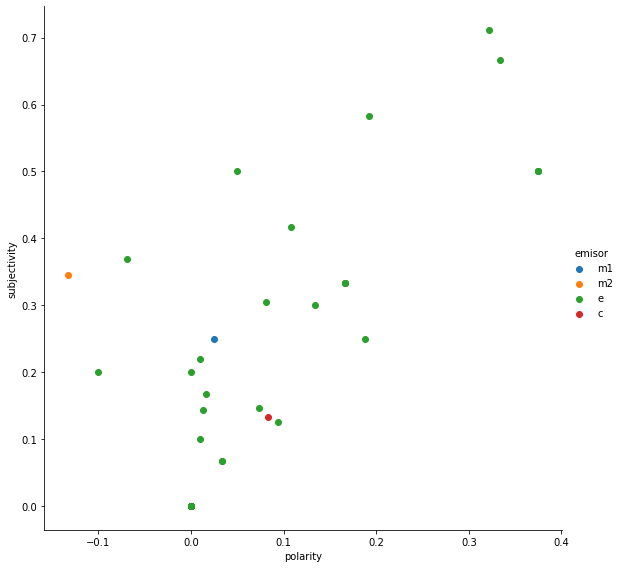

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(n_df, hue="emisor", size=8) \
   .map(plt.scatter, "polarity", "subjectivity") \
   .add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


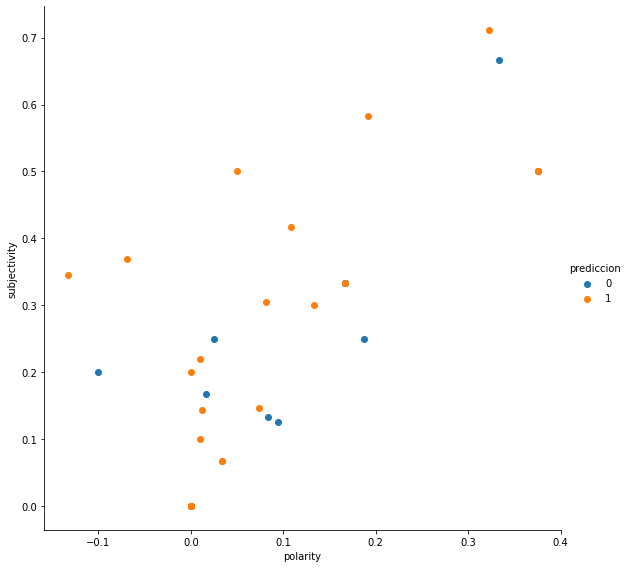

In [31]:
sns.FacetGrid(n_df, hue="prediccion", size=8) \
   .map(plt.scatter, "polarity", "subjectivity") \
   .add_legend()



# 4. Una interpretación escrita de los resultados obtenidos, enmarcada dentro del contexto sistémico del texto original analizado. [30 pts]

* Se tradujo cada interacción de cada emisor (m1, m2 y e). 
* Se decidió no separar por sentencias automáticamente, debido a que se observó que no funcionó de forma correcta, por la falta de puntuación del texto, ya que separaba las frases por el conector “o”, lo que hace perder el sentido de las frases.
* La traducción aritmética a pesar de ser una herramienta útil no presenta las mejoras traducciones. 
 * Por ejemplo, el concepto de cabro como niño es mal traducido. 
* En una traducción donde se menciona que un niño rompe una puerta es traducido como "La cabra rompió la puerta".
 * Además, se separó las frases en palabras, se realizó un análisis de sentimiento con resultado binario, a través de NaiveBayesAnalyzer, mostrando la probabilidad de la predicción, Se evaluó la subjetividad y polaridad de cada frase.
* Todo lo anterior se agregó a un df, para su posterior interpretación
Adicionalmente se realizó una clasificación de positividad binaria, a través de PositiveNaiveBayesClassifier, cuyos resultados fueron contrastados con los resultados del análisis de sentimientos anterior (asumiéndolos como verdadero). Se validó el funcionamiento previamente con traducciones de Google Translate y se obtuvo algunas métricas de desempeño del modelo, la matriz de confusión y graficas de disepersión para interpretar los resultados.
* El clasificador PositiveNaiveBayesClassifier puede llegar a obtener un 100% de exactitud, pero se estima la necesidad de un overfitting, si se pasatodas las traducciones del dataset.
* Cabe destacar que se intentó usar el clasificador NaiveBayesClassifier pero este presentaba errores importantes, haciendo que todas las predicciones sean positivas con un 99% de probabilidad.
* Los resultados del modelo PositiveNaiveBayesClassifier, respecto del análisis de NaiveBayesAnalyzer, muestra desempeños aceptables sobre el 70% de exactitud y sobre 80% de precisión.
 * Cabe destacar que esta modelación se realizó con la finalidad de hacer el ejercicio, ya que, para evaluar de forma correcta el desempeño del modelo, se requiere contar con una clasificación previa validada.
* En el gráfico de dispersión, en términos generales se puede indicar que la mayor parte de las interacciones, se da en el cuadrante de polaridad positiva o neutra y subjetividad menor al 50%, lo que concuerda con las predicciones del modelo. también se puede destacar que a mayor positivad, se tiene mayor subjetividad de las interacciones.
* Por otro lado, se puede indicar que el entrevistador m1, tiene interacciones de baja polaridad positiva y baja subjetividad, a diferencia del m2 que tiene una baja polaridad negativa y una mayor subjetividad. 
* Respecto del entrevistado, mantiene interacciones dispersas dentro del cuadrante de polaridad positiva y un par de interacciones de polaridad negativa.



* La tracucción aritmética a pesar de ser una herramienta útil no presenta las mejoras traducciones.
  * Por ejemplo, el concepto de cabro como niño es mal traducido. En una traducción donde se menciona que un niño rompe una puerta es traducido como "La cabra rompio la puerta".
* La función sentence de textblob presenta ciertos inconvenientes, se intento una primera iteracción partiendo los comentarios de los clientes en varias fracciones donde no necesariamente había un punto a parte.
* Las traducciones de los parrafos pueden ser tr



## Ayuda adicional...

Para más ayuda puedes consultar [este tutorial básico](http://textblob.readthedocs.org/en/dev/quickstart.html).

Aquí hemos usado solo las herramientas con opciones por defecto. Para personalizar las herramientas de `TextBlob`, se puede mirar la [documentación avanzada](http://textblob.readthedocs.org/en/dev/advanced_usage.html#advanced). 